# Identification

In [1]:
# import packages
import numpy as np
from PIL import Image
from numpy import histogram as hist  # call hist, otherwise np.histogram
import matplotlib.pyplot as plt

import histogram_module
import dist_module
import gauss_module
import match_module
import rpc_module



def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

## Point 2

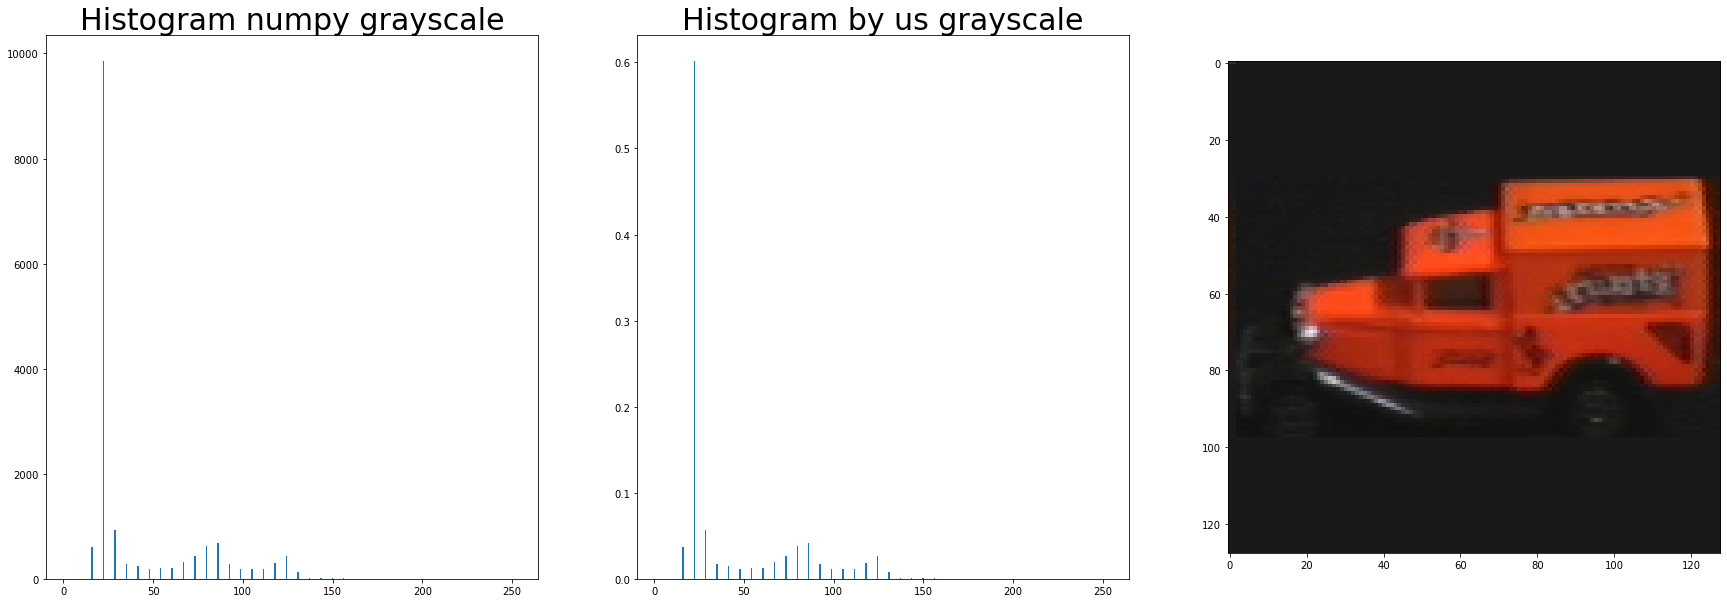

In [2]:
## gray-value histograms (Question 2.a)

img_color = np.array(Image.open('./model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
num_bins_gray = 40
plt.title('Histogram numpy grayscale', fontsize = 30)
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0, 255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1)

plt.subplot(1,3,2)
plt.title('Histogram by us grayscale', fontsize = 30)
hist_gray2, bin_gray2 = histogram_module.normalized_hist(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2)

#plt.show()

plt.subplot(1,3,3)
plt.imshow(img_color)
plt.savefig('Histogram_gray')

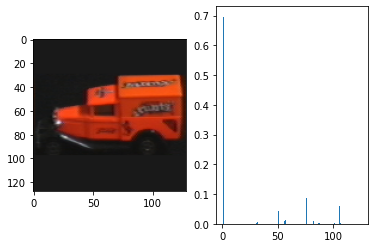

In [3]:
## more histograms (Question 2.b)

#Compose and test RGB histograms (histogram_module.rgb_hist)
plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rgb = histogram_module.rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rgb.size+1)),hist_rgb)
plt.show()

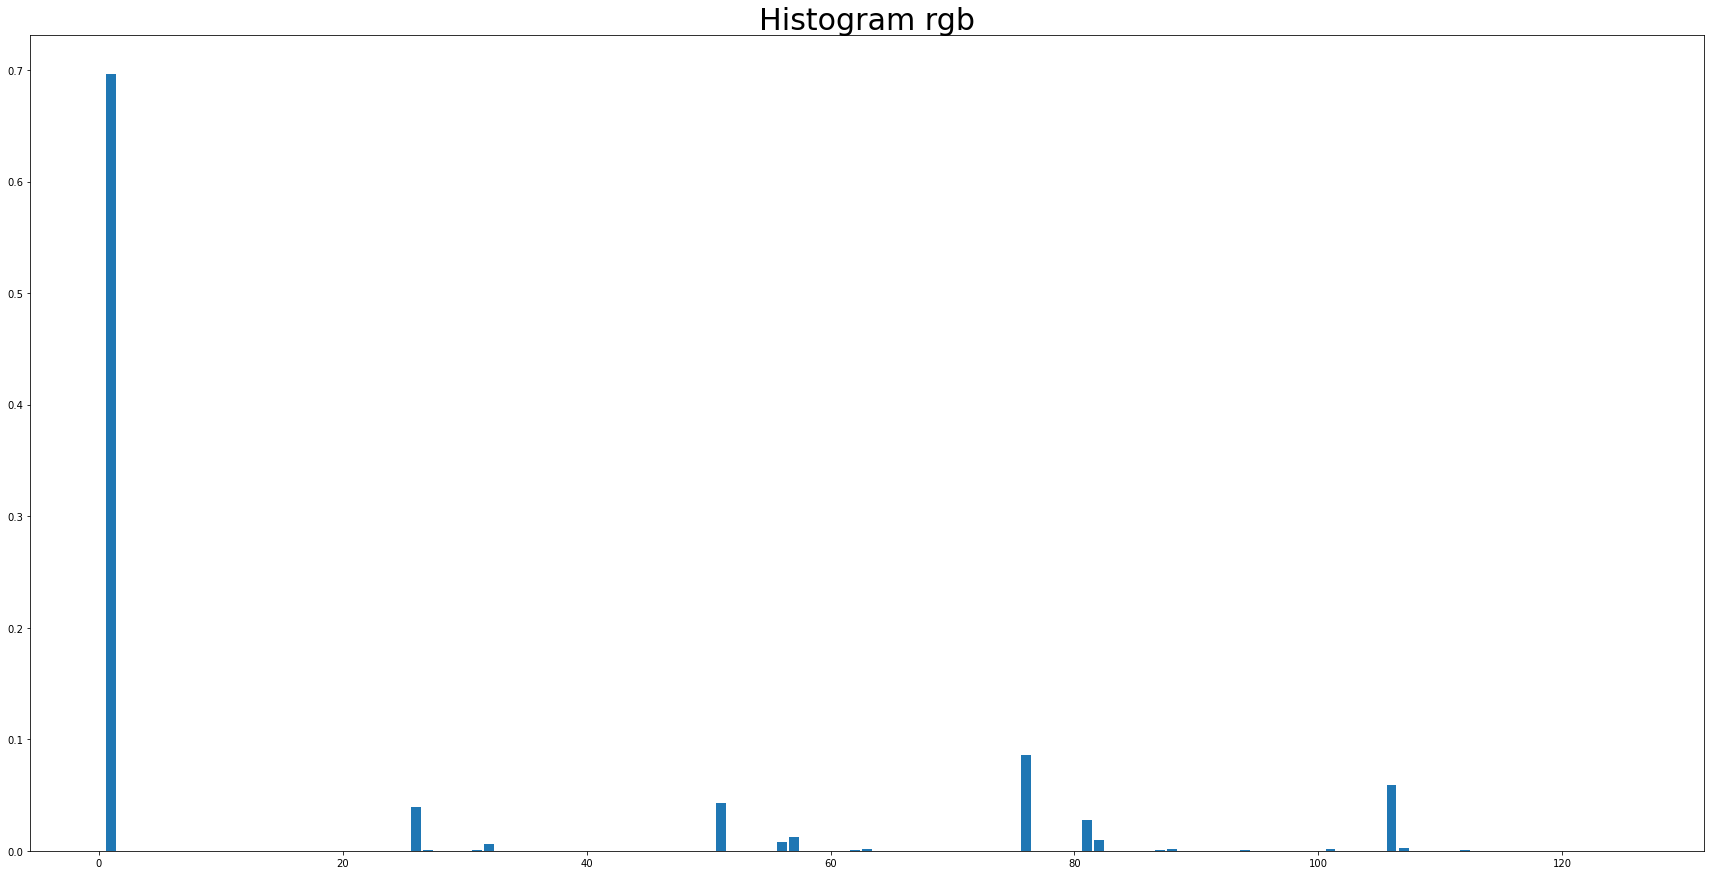

In [4]:
## Focus on the histogram
plt.figure(figsize = (30, 15))

num_bins_color = 5
plt.title('Histogram rgb', fontsize = 30)
hist_rgb = histogram_module.rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rgb.size+1)),hist_rgb)
plt.savefig('Histogram_rgb')
plt.show()

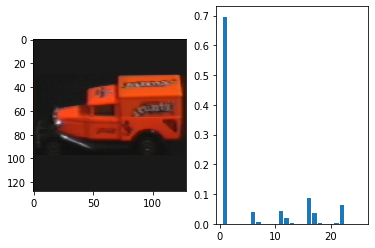

In [5]:
#Compose and test RG histograms (histogram_module.rg_hist)
plt.figure(3)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rg = histogram_module.rg_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)
plt.show()

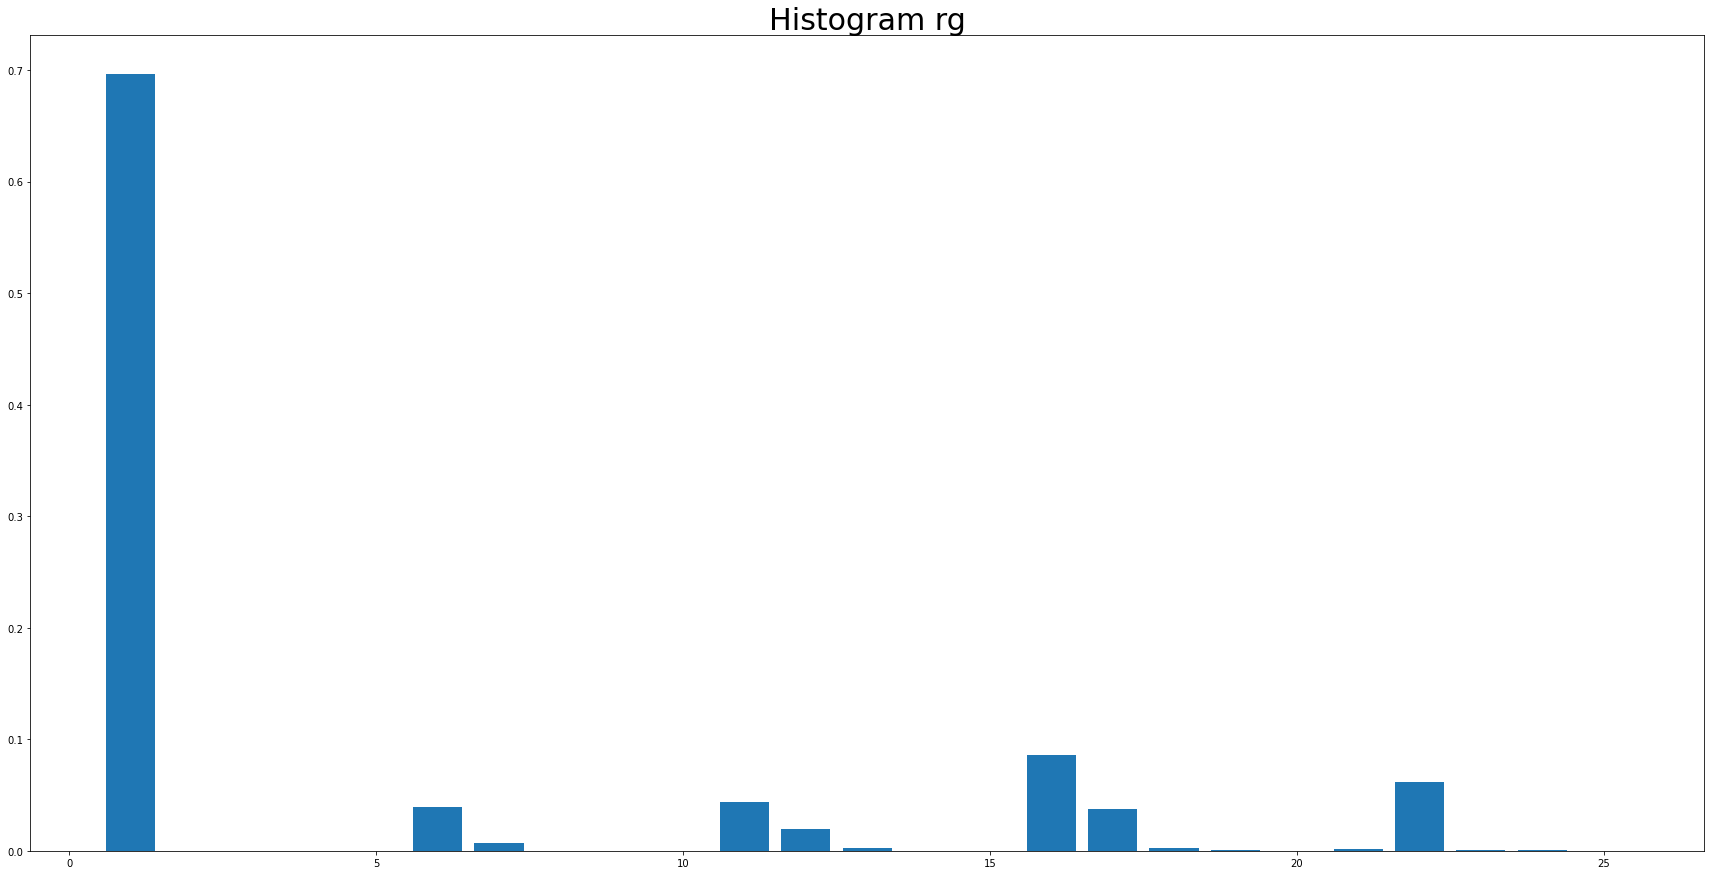

In [6]:
#Focus on the histogram
plt.figure(figsize = (30, 15))

num_bins_color = 5
plt.title('Histogram rg', fontsize = 30)
hist_rg = histogram_module.rg_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)
plt.savefig('Histogram_rg')
plt.show()

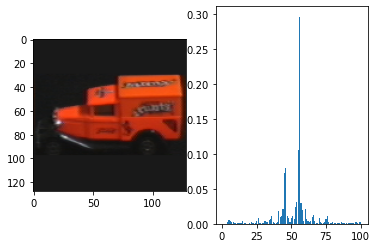

In [7]:
#Compose and test dxdy histograms (histogram_module.dxdy_hist)
plt.figure(5)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_dxdy = 10
plt.subplot(1,2,2)
hist_dxdy = histogram_module.dxdy_hist(img_gray, num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.show()

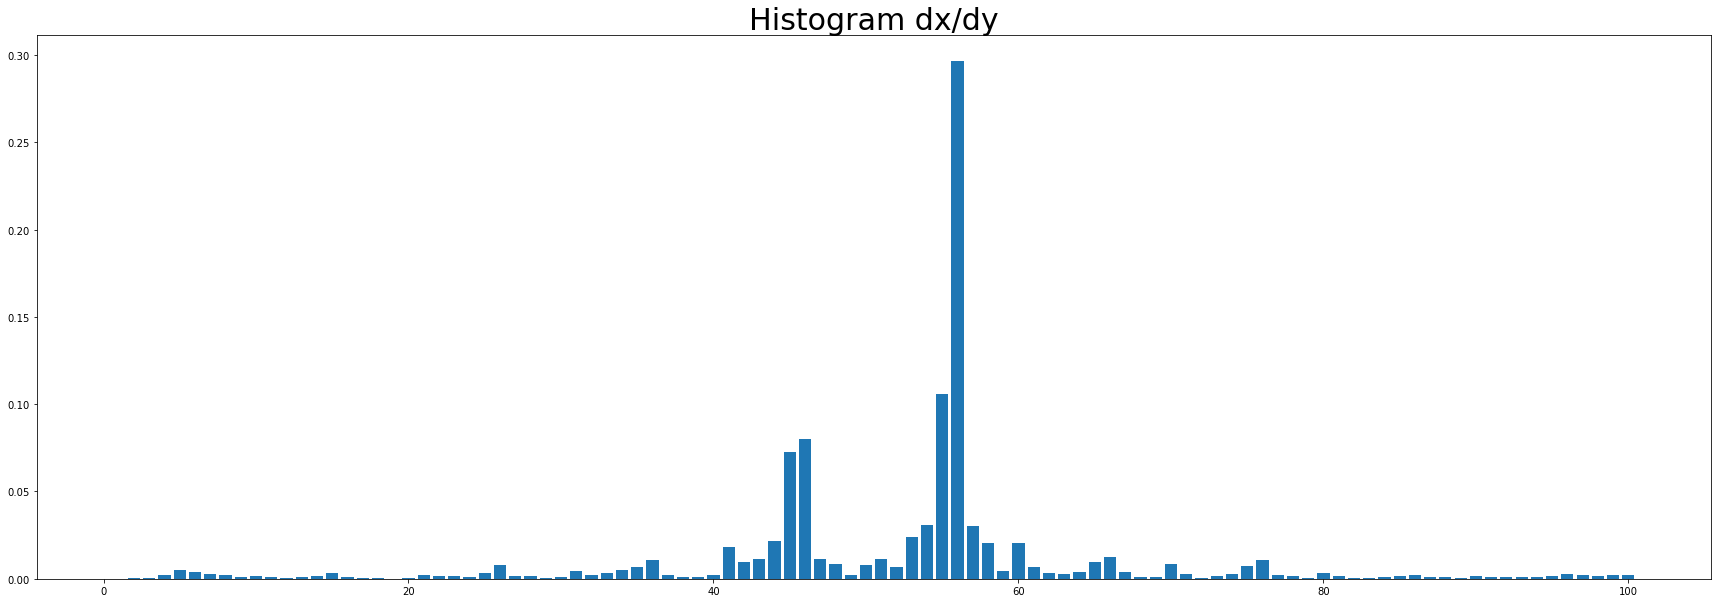

In [8]:
#Focus on the histogram
plt.figure(figsize = (30, 10))

num_bins_dxdy = 10
plt.title('Histogram dx/dy', fontsize = 30)
hist_dxdy = histogram_module.dxdy_hist(img_gray, num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.savefig('Histogram_dx_dy')
plt.show()

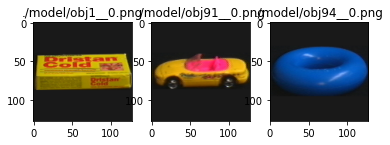

Distance according to dist_l2 0.003344
Distance according to dist_interset 0.293152
Distance according to dist_chi2 0.002280


In [9]:
#Computing distances
image_files1 = ['./model/obj1__0.png']
image_files2 = ['./model/obj91__0.png', './model/obj94__0.png']

plt.figure()
plt.subplot(1,3,1); plt.imshow(np.array(Image.open(image_files1[0])), vmin=0, vmax=255); plt.title(image_files1[0])
plt.subplot(1,3,2); plt.imshow(np.array(Image.open(image_files2[0])), vmin=0, vmax=255); plt.title(image_files2[0])
plt.subplot(1,3,3); plt.imshow(np.array(Image.open(image_files2[1])), vmin=0, vmax=255); plt.title(image_files2[1])
plt.show()

img1_color = np.array(Image.open(image_files1[0]))
img2_color = np.array(Image.open(image_files2[0]))
num_bins_color = 30
hist1_rgb = histogram_module.rgb_hist(img1_color.astype('double'), num_bins_color)
hist2_rgb = histogram_module.rgb_hist(img2_color.astype('double'), num_bins_color)

print('Distance according to dist_l2 %f'% dist_module.dist_l2(hist1_rgb,hist2_rgb))
print('Distance according to dist_interset %f'% dist_module.dist_intersect(hist1_rgb,hist2_rgb))
print('Distance according to dist_chi2 %f'% dist_module.dist_chi2(hist1_rgb,hist2_rgb))

In [10]:
distance_types = ['l2', 'intersect', 'chi2']
print('distance functions:', distance_types)

hist_types = ['grayvalue', 'rgb', 'rg', 'dxdy']
print('histogram types:', hist_types)

num_bins_color = 30;
num_bins_gray = 90;

for img1_file in image_files1:
    img1_color = np.array(Image.open(img1_file))
    img1_color = img1_color.astype('double')
    img1_gray = rgb2gray(img1_color)
    
    for img2_file in image_files2:
        img2_color = np.array(Image.open(img2_file))
        img2_color = img2_color.astype('double')
        img2_gray = rgb2gray(img2_color)
    
        D = np.zeros( (len(distance_types),len(hist_types)) )
    
        for didx in range(len(distance_types)):
    
            for hidx in range(len(hist_types)):
    
                if histogram_module.is_grayvalue_hist(hist_types[hidx]):
                    hist1 = histogram_module.get_hist_by_name(img1_gray, num_bins_gray, hist_types[hidx])
                    hist2 = histogram_module.get_hist_by_name(img2_gray, num_bins_gray, hist_types[hidx])
            
                else:
                    hist1 = histogram_module.get_hist_by_name(img1_color, num_bins_color, hist_types[hidx])
                    hist2 = histogram_module.get_hist_by_name(img2_color, num_bins_color, hist_types[hidx])
    
                if len(hist1) == 2:
                    hist1 = hist1[0]
                if len(hist2) == 2:
                    hist2 = hist2[0]
    
                D[didx, hidx] = dist_module.get_dist_by_name(hist1, hist2, distance_types[didx])
         
        print('Comparison of images "%s" to "%s":'% (img1_file, img2_file))
        print(D)
        print('\n')


print('Legend:')
print('%s-%s, %s-%s, %s-%s, %s-%s'%('l2', 'grayvalue', 'l2', 'rgb', 'l2', 'rg', 'l2', 'dxdy'))
print('%s-%s, %s-%s, %s-%s, %s-%s'%('intersect', 'grayvalue', 'intersect', 'rgb', 'intersect', 'rg', 'intersect', 'dxdy'))
print('%s-%s, %s-%s, %s-%s, %s-%s'%('chi2', 'grayvalue', 'chi2', 'rgb', 'chi2', 'rg', 'chi2', 'dxdy'))

distance functions: ['l2', 'intersect', 'chi2']
histogram types: ['grayvalue', 'rgb', 'rg', 'dxdy']
Comparison of images "./model/obj1__0.png" to "./model/obj91__0.png":
[[0.00331793 0.0033444  0.00523529 0.00149039]
 [0.13391113 0.29315186 0.25354004 0.28155518]
 [0.0023206  0.00227974 0.0034302  0.00127916]]


Comparison of images "./model/obj1__0.png" to "./model/obj94__0.png":
[[0.01713217 0.01527517 0.01669424 0.0115362 ]
 [0.36340332 0.4664917  0.43395996 0.41265869]
 [0.01257022 0.00987754 0.01365015 0.00795766]]


Legend:
l2-grayvalue, l2-rgb, l2-rg, l2-dxdy
intersect-grayvalue, intersect-rgb, intersect-rg, intersect-dxdy
chi2-grayvalue, chi2-rgb, chi2-rg, chi2-dxdy


## Point 3

In [11]:
with open('model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images] 

with open('query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

dist_type = 'intersect';
hist_type = 'rg';
num_bins = 30;

[best_match, D] = match_module.find_best_match(model_images, query_images, dist_type, hist_type, num_bins)

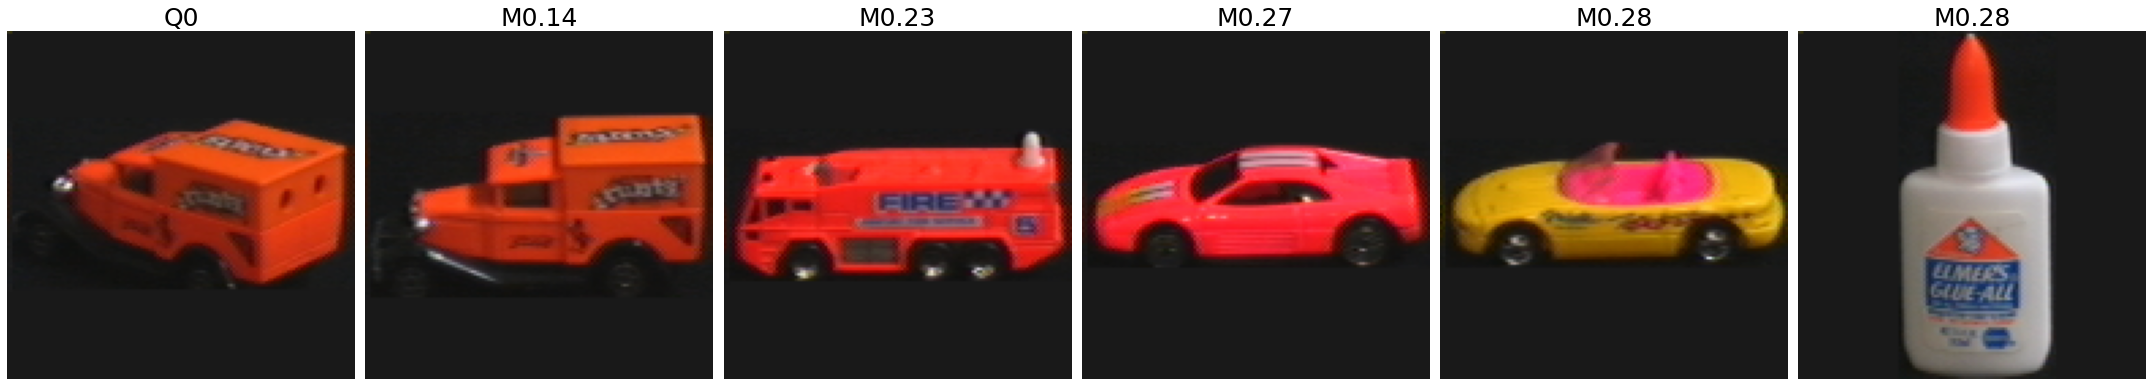

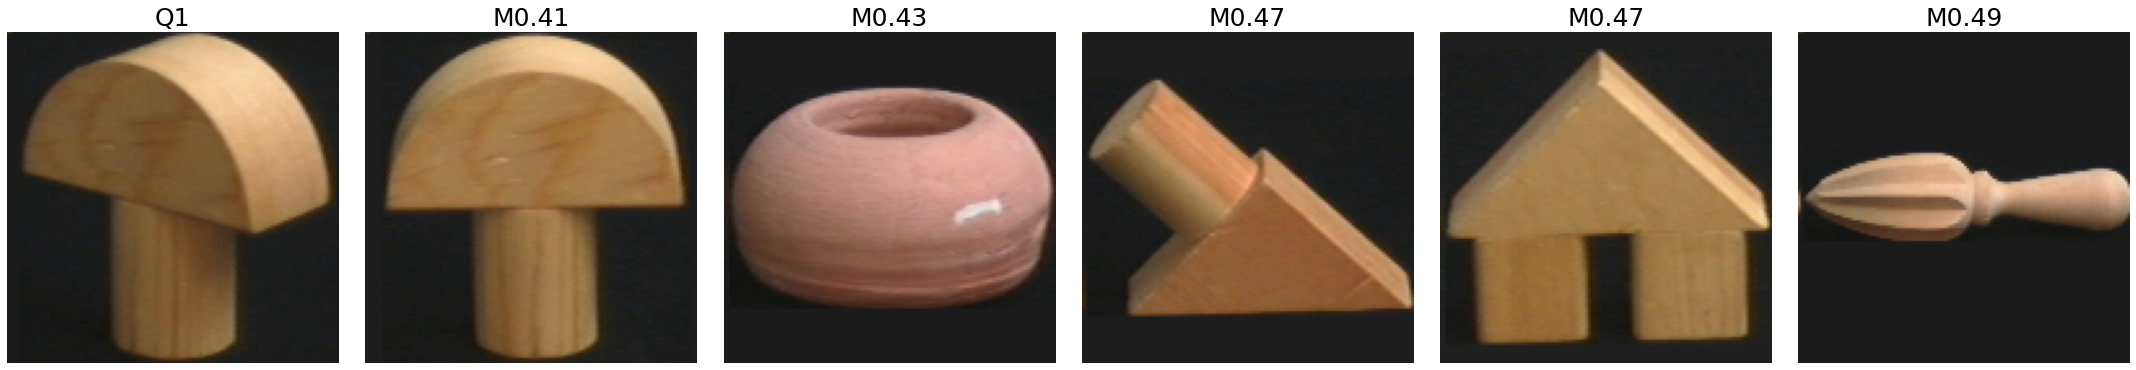

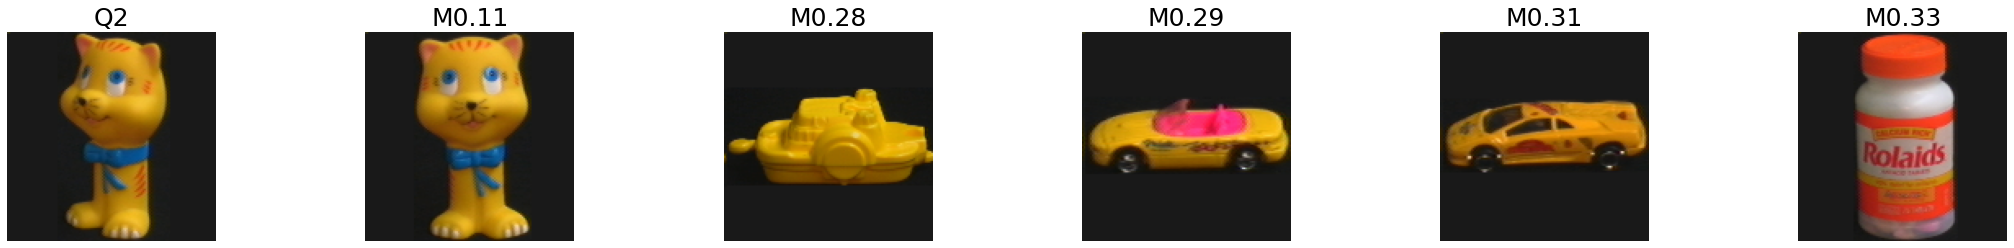

In [13]:
## visualize nearest neighbors (Question 3.b)
query_images_vis = [query_images[i] for i in np.array([0,4,9])]
match_module.show_neighbors(model_images, query_images_vis, dist_type, hist_type, num_bins)

In [14]:
##Trying out different combinations of histogram types, distances and number of bins

histograms = ['grayvalue', 'rgb', 'rg', 'dxdy']
distances = ['chi2', 'l2', 'intersect']
n_bins = [3, 10, 20]

for hist_type in histograms:
    
    for dist_type in distances:
        
        for num_bins in n_bins:
            
            print(hist_type + '-' + dist_type + '-bins ' + str(num_bins))
            
            [best_match, D] = match_module.find_best_match(model_images, query_images, dist_type, hist_type, num_bins)
            
            num_correct = sum( best_match == range(len(query_images)) )
            recognition_rate = round(num_correct / len(query_images), 4)
            
            print('Correct: {}, Recognition rate: {}\n'.format(num_correct, recognition_rate))

grayvalue-chi2-bins 3
Correct: 21, Recognition rate: 0.236

grayvalue-chi2-bins 10
Correct: 42, Recognition rate: 0.4719

grayvalue-chi2-bins 20
Correct: 37, Recognition rate: 0.4157

grayvalue-l2-bins 3
Correct: 19, Recognition rate: 0.2135

grayvalue-l2-bins 10
Correct: 39, Recognition rate: 0.4382

grayvalue-l2-bins 20
Correct: 34, Recognition rate: 0.382

grayvalue-intersect-bins 3
Correct: 20, Recognition rate: 0.2247

grayvalue-intersect-bins 10
Correct: 45, Recognition rate: 0.5056

grayvalue-intersect-bins 20
Correct: 46, Recognition rate: 0.5169

rgb-chi2-bins 3
Correct: 58, Recognition rate: 0.6517

rgb-chi2-bins 10
Correct: 60, Recognition rate: 0.6742

rgb-chi2-bins 20
Correct: 48, Recognition rate: 0.5393

rgb-l2-bins 3
Correct: 57, Recognition rate: 0.6404

rgb-l2-bins 10
Correct: 54, Recognition rate: 0.6067

rgb-l2-bins 20
Correct: 42, Recognition rate: 0.4719

rgb-intersect-bins 3
Correct: 63, Recognition rate: 0.7079

rgb-intersect-bins 10
Correct: 70, Recognition rat

## Point 4

In [15]:
with open('model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images] 

with open('query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

num_bins = 20;

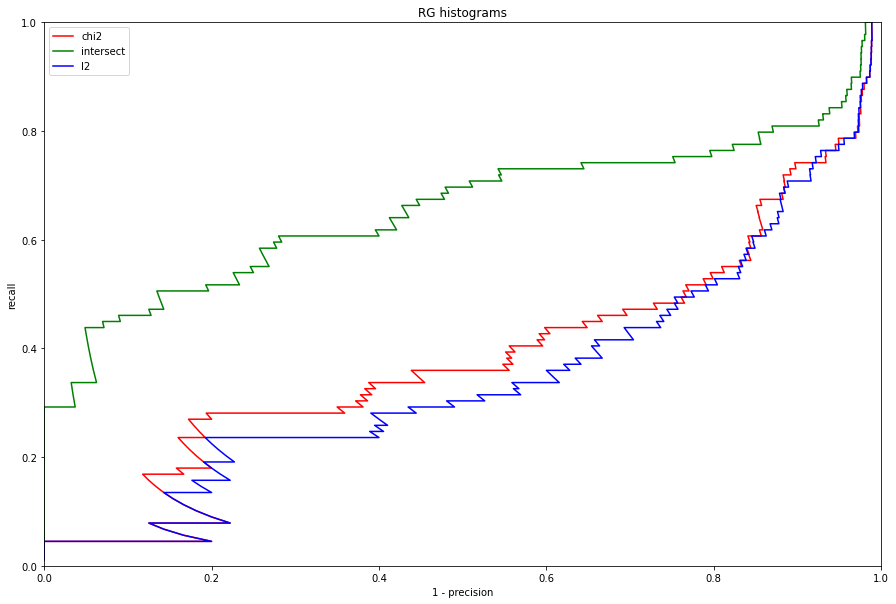

In [16]:
plt.figure(figsize = (15, 10))
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rg', num_bins, ['r', 'g', 'b'])
plt.title('RG histograms')
plt.show()

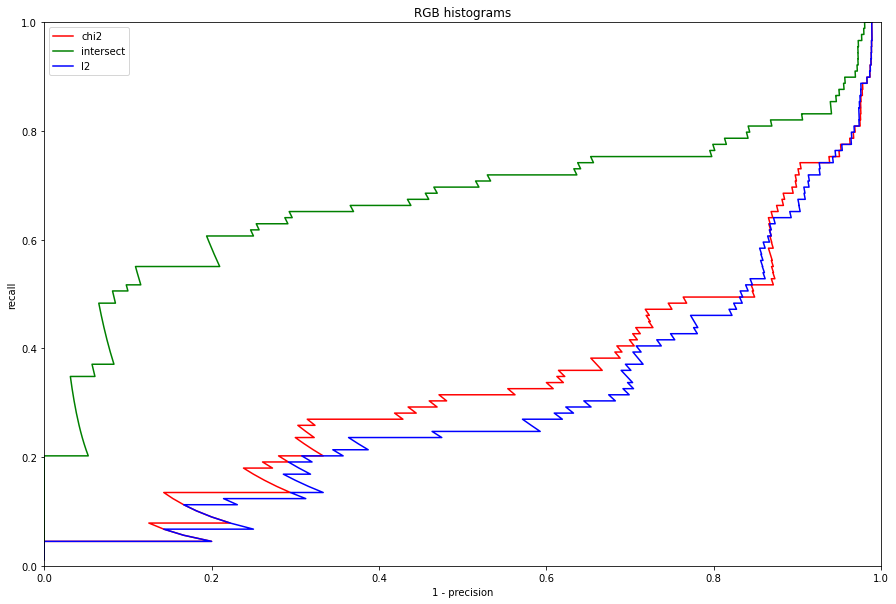

In [17]:
plt.figure(figsize = (15, 10))
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rgb', num_bins, ['r', 'g', 'b'])
plt.title('RGB histograms')
plt.show()

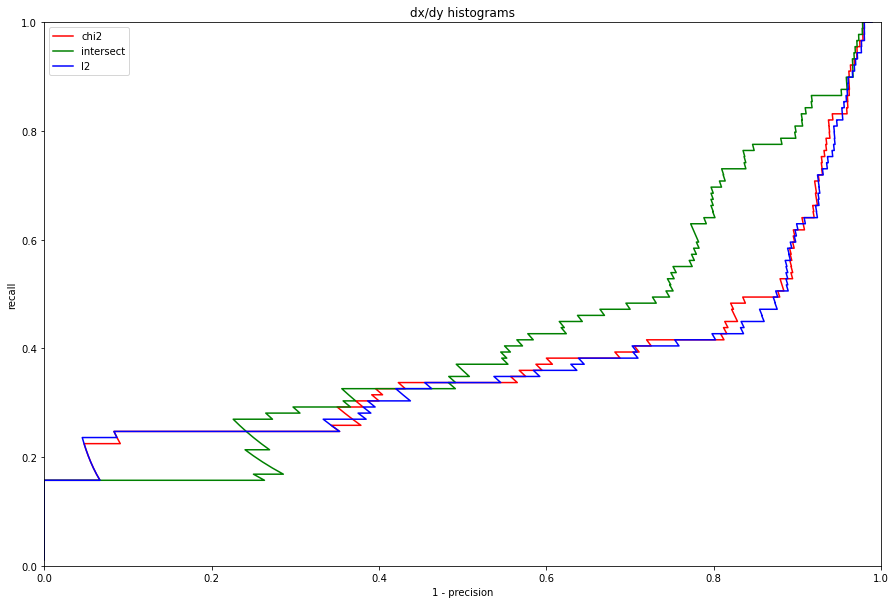

In [18]:
plt.figure(figsize = (15, 10))
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'dxdy', num_bins, ['r', 'g', 'b'])
plt.title('dx/dy histograms')
plt.show()

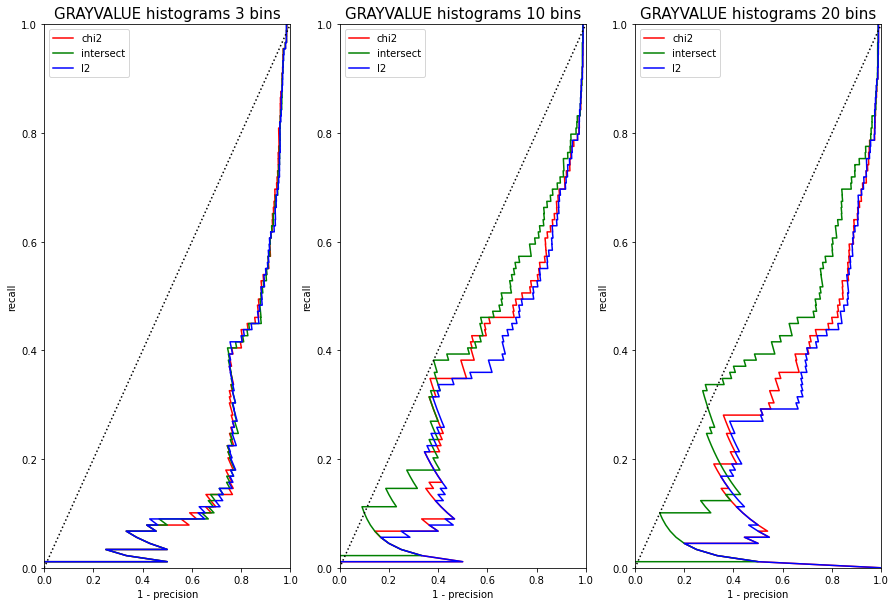

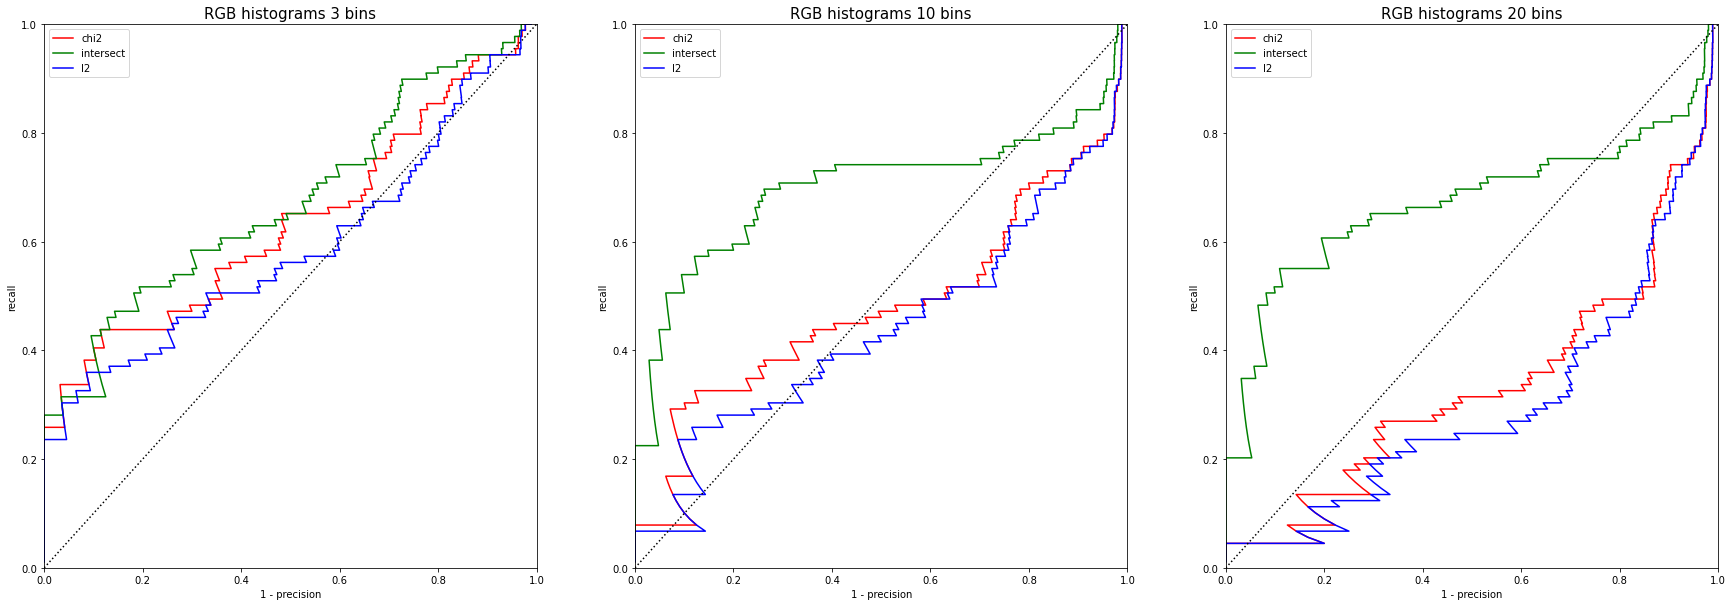

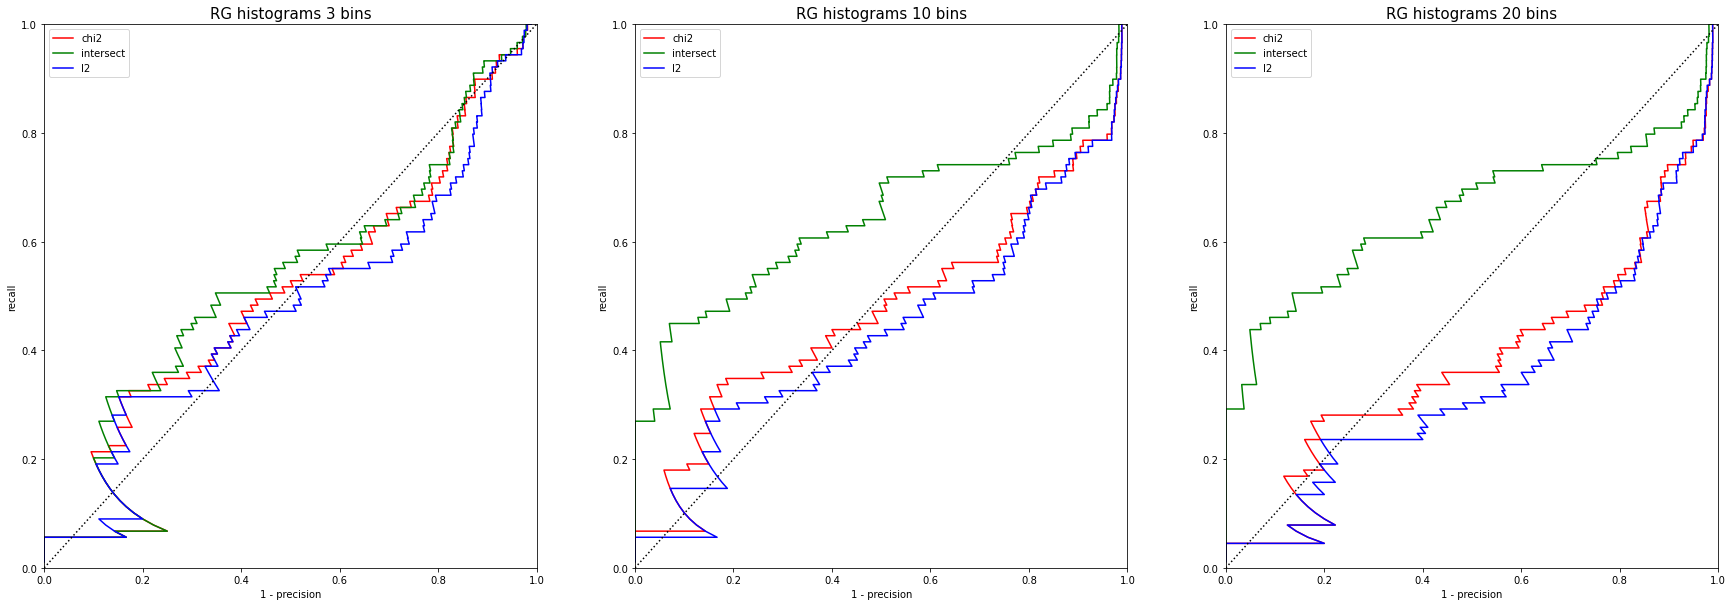

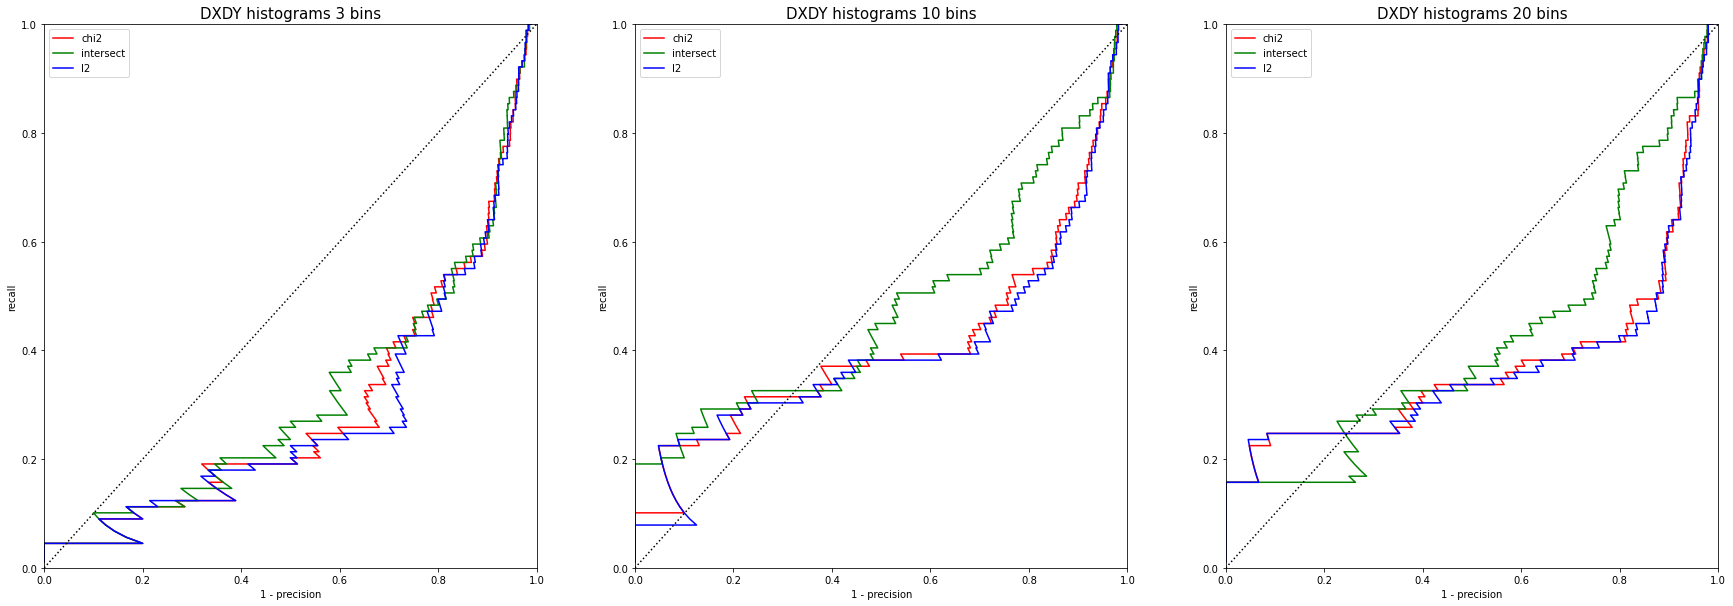

In [19]:
##Trying out different combinations of histogram types, distances and number of bins

n_bins = [3, 10, 20]
histograms = ['grayvalue', 'rgb', 'rg', 'dxdy']

fig = plt.figure(figsize = (15, 10))    
for histo_type in histograms:
    cc = 1 
    for num_bins in n_bins:
        plt.subplot(1, 3, cc)
        rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], histo_type, num_bins, ['r', 'g', 'b'])
        plt.title('{} histograms {} bins'.format(histo_type.upper(), num_bins), fontsize = 15)
        x=np.linspace(0,1,101)
        plt.plot(x, x, ':', color = 'black')
        cc += 1
    plt.savefig('rpcurve_new\ new new {} histograms with {} different bins.png'.format(histo_type.upper(), len(n_bins) ))   
    plt.show()